========================================================================

# INSURANCE COST PREDICTION EDA & GUI

========================================================================

# Import Libary yang Dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

import joblib
from tkinter import *
import joblib

# Upload Dataset 

In [2]:
df_ori = pd.read_csv('insurance.csv')
df_ori

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Copy Dataset

In [3]:
df = df_ori.copy(deep=True)

### Labelling Data

In [4]:
df['sex'] = df['sex'].replace({'male':0, 'female':1})
df['smoker'] = df['smoker'].replace({'yes':0, 'no':1})
df['region'] = df['region'].replace({'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3})

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


# Exploratory Data Analysis

Beberapa pertanyaan penting yang perlu dicari jawabannya dalam dataset ini :

1. Apa saja variabel yang berpengaruh signifikan terhadap pengenaan biaya asuransi ?
2. Apakah peserta asuransi cenderung berumur muda atau dewasa ( <= 40 tahun > atau tua ( > 40 tahun ) ?
3. Bagaimana komposisi jenis kelamin dalam dataset ini? Apakah seimbang?
4. Apakah sama biaya asuransi bagi peserta dengan variabel yang sama tapi beda jenis kelamin? 
5. Gambarkan sebaran dan persentase perokok secara keseluruhan
6. Gambarkan sebaran jumlah perokok di masing masing umur
7. Gambarkan sebaran jumlah perokok berdasarkan jenis kelamin
8. Gambarkan secara visual pengaruh umur, jenis kelamin dan status merokok peserta terhadap biaya asuransi yang dikenakan
9. Berapa perbedaan rata-rata biaya yang dikenakan dibandingkan dengan tidak perokok di usia yang sama?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.795217,1.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Q1. Apa saja variabel yang berpengaruh signifikan terhadap pengenaan biaya asuransi ?

In [7]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.006308,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.012816,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.262754,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.001205,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.038873,-0.787251
region,0.006308,0.012816,-0.262754,0.001205,0.038873,1.000000,-0.039473
charges,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.039473,1.000000


In [8]:
df_corr_to_charge = pd.DataFrame({
    'variables': ['age', 'sex', 'bmi', 'children', 'smoker', 'region'], 
    'corr_values': [0.299008, abs(-0.057292), 0.198341, 0.067998, abs(-0.787251), abs(-0.039473)]
})
df_corr_to_charge.sort_values(by=('corr_values'), ascending=False)

,variables,corr_values
4,smoker,0.787251
0,age,0.299008
2,bmi,0.198341
3,children,0.067998
1,sex,0.057292
5,region,0.039473


Dari tabel diatas dapat dilihat bahwa variabel yang berpengaruh signifikan secara berurutan adalah : 'smoker', 'age', 'bmi, children', 'sex', 'region'

### Q2. Apakah peserta asuransi cenderung berumur muda atau dewasa ( <= 40 tahun > atau tua ( > 40 tahun ) ?

In [9]:
print('Jumlah peserta asuransi yang berumur kurang dan sama dengan 40 tahun : ', df[df.age<=40]['age'].count())
print('Jumlah peserta asuransi yang berumur diatas 40 tahun                 : ', df[df.age>40]['age'].count())

Jumlah peserta asuransi yang berumur kurang dan sama dengan 40 tahun :  701
Jumlah peserta asuransi yang berumur diatas 40 tahun                 :  637


Text(0, 0.5, 'Umur')

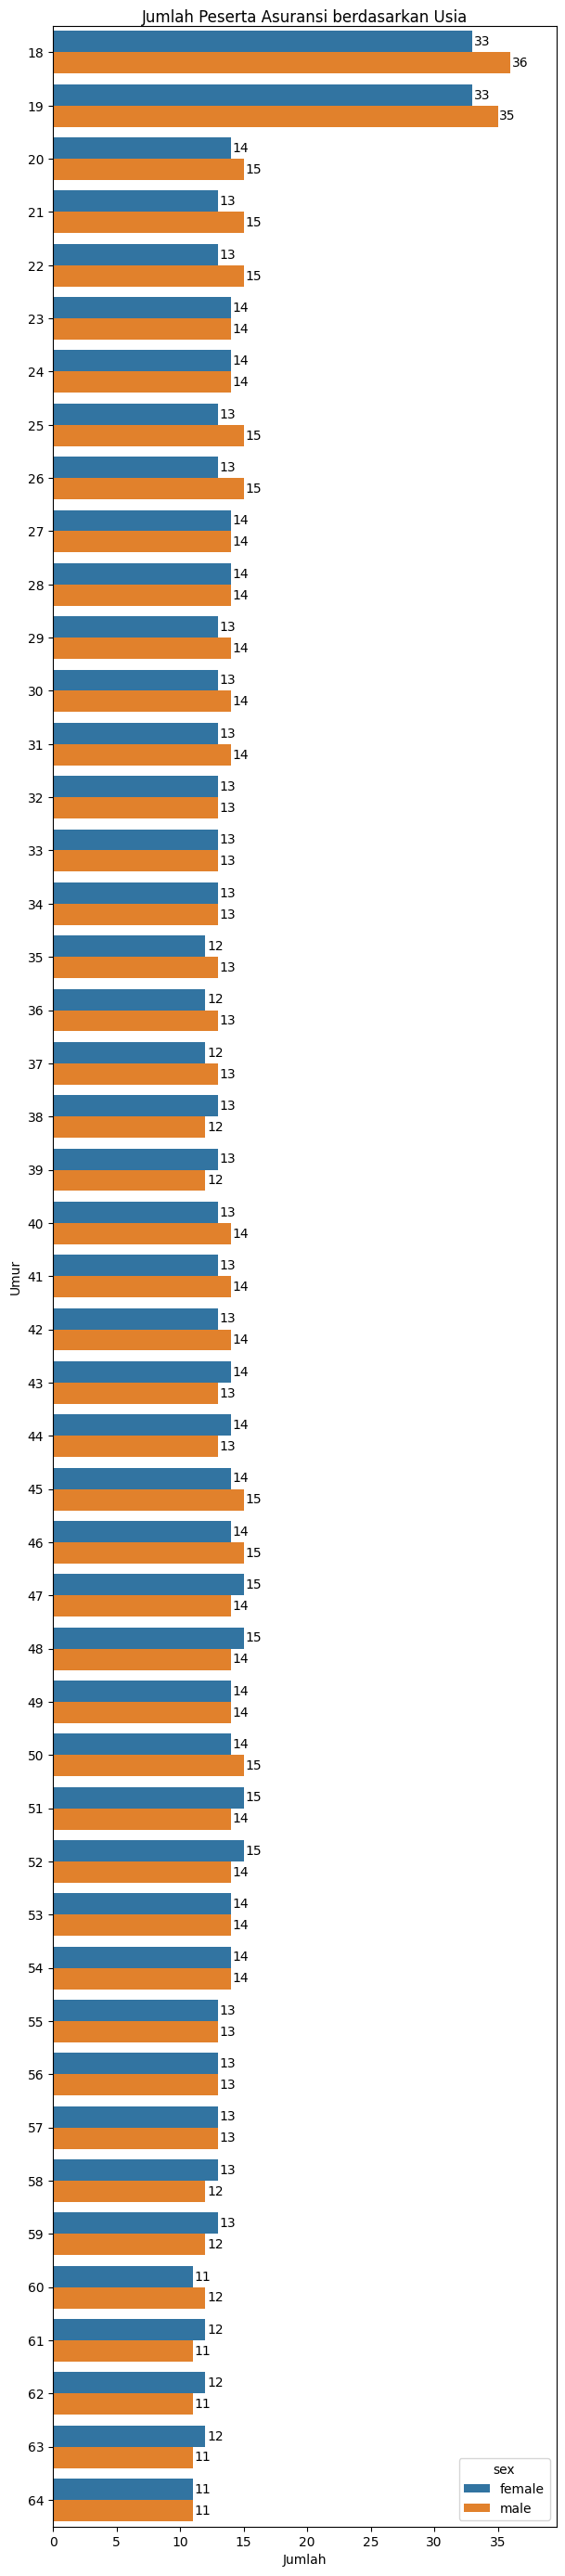

In [10]:
plt.figure(figsize=(7,35))
ax = sns.countplot(y=df_ori.age, hue=df_ori.sex, width=0.8, orient='v')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1.2, fontsize=10)
ax.margins(x=0.1)

plt.title('Jumlah Peserta Asuransi berdasarkan Usia', pad=2)
plt.xlabel('Jumlah')
plt.ylabel('Umur')

Dari hasil analisa diatas diketahui bahwa mayoritas peserta asuransi berumur 18 hingga 40 tahun dengan peserta terbanyak berumur 18 dan 19 tahun 

### Q3. Bagaimana komposisi jenis kelamin dalam dataset ini? Apakah seimbang?

,sex
male,676
female,662


Text(0.5, 0, 'Jenis Kelamin')

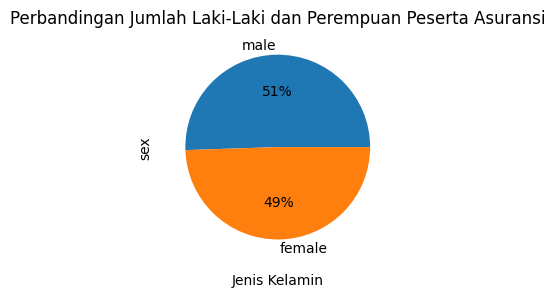

In [11]:
display(df_ori.sex.value_counts().to_frame())
ax = df_ori.sex.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(3,3))
plt.title('Perbandingan Jumlah Laki-Laki dan Perempuan Peserta Asuransi')
plt.xlabel('Jenis Kelamin')

In [12]:
male_series = df[df_ori.sex=='male']['age'].groupby(df.age).size()
female_series = df[df_ori.sex=='female']['age'].groupby(df.age).size()

age_by_sex = pd.DataFrame({
    'male': male_series,
    'female': female_series,
})
print('Jumlah baris dan kolom: ', age_by_sex.shape)
print('\nJumlah terendah :') 
display(age_by_sex.min())
print('\nJumlah tertinggi :')
display(age_by_sex.max())
display(age_by_sex.head())

Jumlah baris dan kolom:  (47, 2)

Jumlah terendah :


male      11
female    11
dtype: int64


Jumlah tertinggi :


male      36
female    33
dtype: int64

,male,female
age,,
18,36,33
19,35,33
20,15,14
21,15,13
22,15,13


Text(0, 0.5, 'Jumlah')

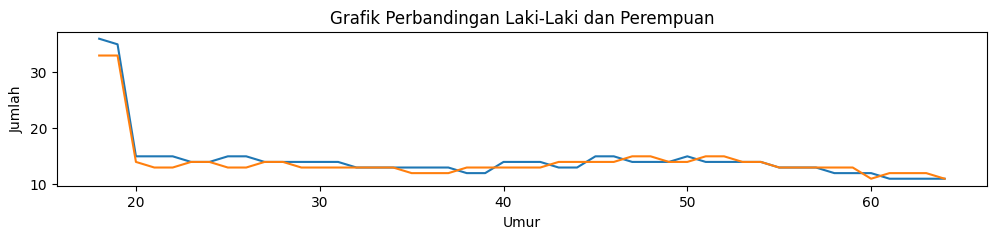

In [13]:
plt.figure(figsize=(12,2))
ax = male_series.plot(kind='line')
ax = female_series.plot(kind='line')

plt.title('Grafik Perbandingan Laki-Laki dan Perempuan')
plt.xlabel('Umur')
plt.ylabel('Jumlah')

Dari hasil analisa diatas dapat disimpulkan bahwa Komposisi jumlah laki-laki dan perempuan pada dataset ini hampir seimbang.

### Q4. Apakah sama biaya asuransi bagi peserta dengan variabel yang sama tapi beda jenis kelamin?

In [14]:
df_ori.charges.value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [15]:
df_ori[df_ori.charges==1639.56310]


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


Setelah dilakukan analisis, dari semua data pada kolom 'charges' semua nilai unique dan tidak ada seorangpun yang memiliki biaya pembayaran yang sama dari 1338 orang tersebut kecuali ada 2 baris yang sama. Setelah diteliti lebih lanjut, diketahui bahwa semua varibel pada kedua data tersebut persis sama. Kemungkinan yang bisa diambil adalah :
1. Data tersebut adalah data duplikat karena kesalahan pengisian data.
2. Data tersebut milik 2 orang yang berbeda, dan kebetulan memiliki variabel-variabel yang sama.

Untuk memastikan apakah data duplikat atau tidak harus ditambahkan variabel lainnya untuk dianalisis seperti nama, nama ayah dan ibu, atau no telfon karena sangat kecil kemungkinan memiliki ayah dan ibu yang sama atau no telpon yang sama. Jika masih sama maka dapat dicek menggunakan ID Card atau Driver license ID karena sangat tidak mungkin orang yang berbeda memiliki no ID Card yang sama.

### Q5. Gambarkan sebaran data perokok secara keseluruhan

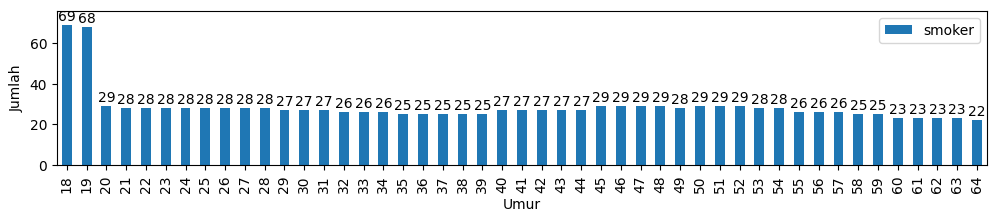

In [16]:
plt.figure(figsize=(12,2))
ax = df_ori.smoker.groupby(df.age).size().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)
plt.xlabel('Umur')
plt.ylabel('Jumlah')
plt.legend()

### Q6. Gambarkan sebaran jumlah perokok di masing masing umur

Jumlah peserta merokok dan tidak merokok adalah : 

Merokok : 274
Tidak Merokok : 1064


Text(0.5, 1.0, 'Perbandingan merokok/tidak merokok berdasarkan umur')

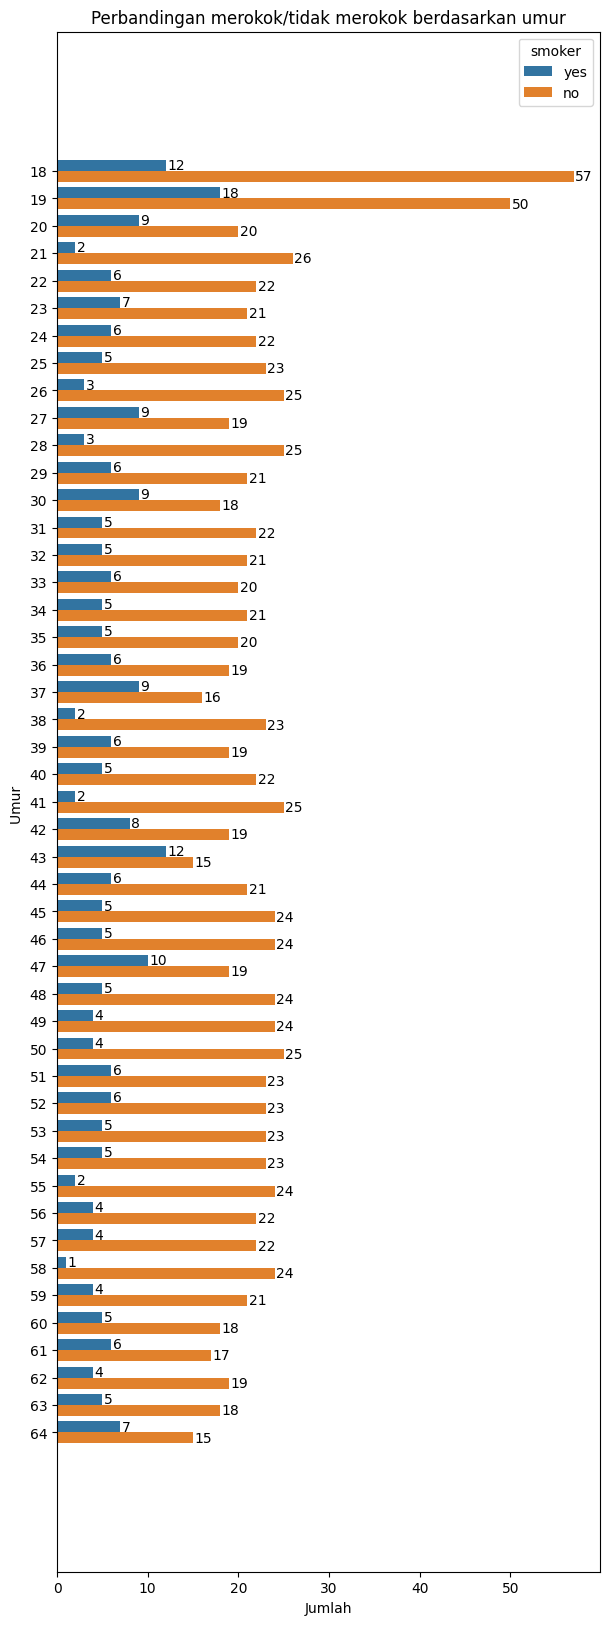

In [17]:
print('Jumlah peserta merokok dan tidak merokok adalah : ')
print('\nMerokok :', df_ori[df_ori.smoker=='yes']['smoker'].count())
print('Tidak Merokok :', df_ori[df_ori.smoker=='no']['smoker'].count())

plt.figure(figsize=(7, 20))
ax = sns.countplot(y=df_ori.age, hue=df_ori.smoker, orient='v')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

plt.xlabel('Jumlah')
plt.ylabel('Umur ')
plt.title('Perbandingan merokok/tidak merokok berdasarkan umur')

### Q7. Gambarkan sebaran jumlah perokok berdasarkan jenis kelamin

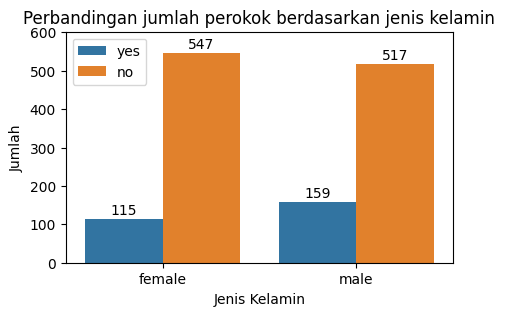

In [18]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(x=df_ori.sex, hue=df_ori.smoker)

for i in ax.containers:
    ax.bar_label(i, label_type='edge', padding=1)
ax.margins(y=0.1)

plt.title('Perbandingan jumlah perokok berdasarkan jenis kelamin', )
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.legend(loc='upper left')

Dari analisa diatas dapat disimpulkan bahwa mayoritas peserta asuran tidak merokok. Dapat dilihat dari grafik yang menunjukkan tinggi bar yang jauh berbeda antara perokok dan tidak perokok. 

### Q8. Gambarkan secara visual pengaruh umur, jenis kelamin dan status merokok peserta terhadap biaya asuransi yang dikenakan

<Figure size 1200x500 with 0 Axes>

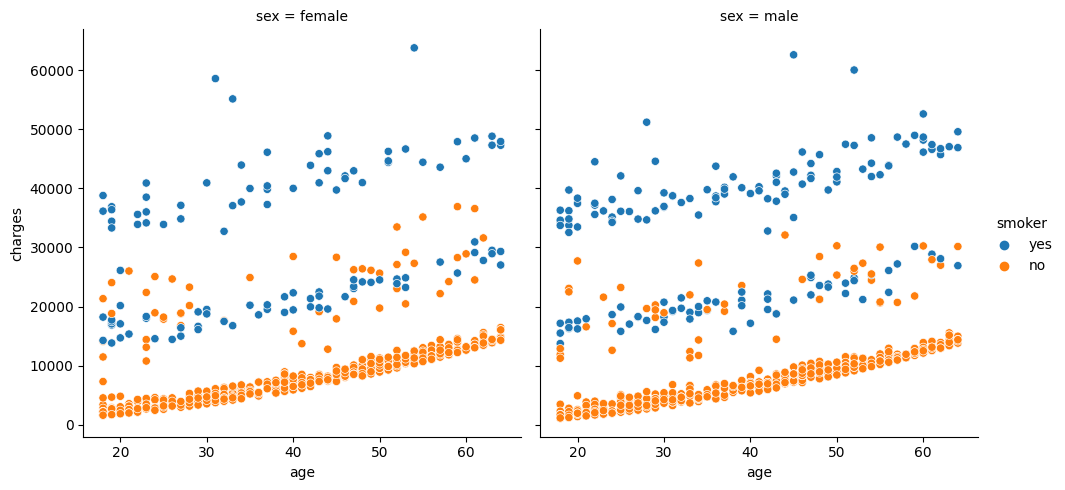

In [19]:
plt.figure(figsize=(12, 5))
sns.relplot(x='age', y='charges', col='sex', hue='smoker', data=df_ori)

Dari grafik dapat disimpulkan bahwa :
    
1. Untuk perokok dan tidak perokok sangat terlihat perbedaan harga asuransi yang dikenakan. Sebagai contoh peserta asuransi yang berumur 18 tahun sampai dengan 30 tahun, yang tidak merokok, biaya asuransi yang dibayarkannya sebagian besar berada di bawah 10.000, dan perokok semuanya diatas 10.000. 
2. Umur sangat mempengaruhi biaya asuransi. Terlihat pada grafik bahwa semakin tinggi umur, walaupun tidak merokok, baik laki-laki maupun perempuan, maka biaya asuransi semakin naik
3. Terdapat warna orange yang masuk ke dalam warna mayoritas berwarna biru. Hipotesis awal ini adalah pengaruh BMI, karena BMI sebelumya memiliki korelasi yang kuat dengan 'charges'. Jadi walaupun tidak merokok, jika ia memiliki nilai BMI yang tinggi, dimungkin bahwa ia beresiko untuk mengambil insurance sehingga 'cost' nya menjadi lebih besar. 

### Q9. Berapa perbedaan rata-rata biaya yang dikenakan dibandingkan dengan tidak perokok di usia yang sama?

In [20]:
3215.162259 - 25473.730221

-22258.567962

In [21]:
smoker_charges = df_ori[df_ori.smoker=='yes'].groupby('age')['charges']
not_smoker_charges = df_ori[df_ori.smoker=='no'].groupby('age')['charges']

smoker_charges_mean = df_ori[df_ori.smoker=='yes'].groupby('age')['charges'].mean()
not_smoker_charges_mean = df_ori[df_ori.smoker=='no'].groupby('age')['charges'].mean()

smoker_yesno_charges = pd.DataFrame({
    'perokok': smoker_charges,
    'bukan_prokok': not_smoker_charges,
    'perokok_mean': smoker_charges_mean,
    'bukan_perokok_mean': not_smoker_charges_mean,
    'selisih_rata_rata': abs(smoker_charges_mean) - abs(not_smoker_charges_mean)
})

smoker_yesno_charges

,perokok,bukan_prokok,perokok_mean,bukan_perokok_mean,selisih_rata_rata
age,,,,,
18,"(18, [34303.1672, 15518.18025, 36149.4835, 128...","(18, [1725.5523, 1137.011, 2198.18985, 3393.35...",25473.730221,3215.162259,22258.567962
19,"(19, [16884.924, 17081.08, 34779.615, 17352.68...","(19, [1837.237, 4687.797, 1625.43375, 1743.214...",27001.232768,3536.712898,23464.519870
20,"(20, [14711.7438, 17560.37975, 17085.2676, 334...","(20, [2257.47525, 2457.21115, 4830.63, 1980.07...",24574.330650,3673.112925,20901.217725
21,"(21, [17942.106, 15359.1045])","(21, [3579.8287, 1532.4697, 2026.9741, 2404.73...",16650.605250,3813.530413,12837.074837
22,"(22, [35585.576, 37165.1638, 35595.5898, 37484...","(22, [2755.02095, 2155.6815, 2045.68525, 2166....",37373.287517,2551.017880,34822.269637
23,"(23, [38511.6283, 18033.9679, 36189.1017, 3602...","(23, [1826.843, 2395.17155, 2775.19215, 1837.2...",31736.345671,5980.978162,25755.367509
24,"(24, [38126.2465, 35147.52848, 14571.8908, 344...","(24, [3046.062, 2855.43755, 3537.703, 25081.76...",29203.496972,5587.430232,23616.066739
25,"(25, [42112.2356, 15817.9857, 19933.458, 36124...","(25, [2721.3208, 4504.6624, 2137.6536, 2523.16...",29577.781200,5547.187943,24030.593257
26,"(26, [36085.219, 14455.64405, 17043.3414])","(26, [2302.3, 3877.30425, 3385.39915, 3490.549...",22528.068150,4166.516168,18361.551982


In [22]:
print('Selisih rata-rata terendah adalah : ', smoker_yesno_charges.selisih_rata_rata.min())
print('Selisih rata-rata tertinggi adalah : ', smoker_yesno_charges.selisih_rata_rata.max())

Selisih rata-rata terendah adalah :  12837.074837307693
Selisih rata-rata tertinggi adalah :  35018.29826916666


Dari Dataset diatas dapat dilihat dengan detail selisih rata-rata biaya asuransi yang dikenakan antara perokok dan tidak perokok pada umur yang sama. Terlihat bahwa minimal selisih adalah 12837.074837307693 dan selisih maksimal adalah 35018.29826916666. 

Perbedaan ini sebenarnya masih harus didalami, karena penelitian belum melibatkan variabel BMI dimana nilai BMI juga sangat berpengaruh terhadap perbedaan biaya asuransi yang dikenakan walaupun peserta tidak merokok. Jika peserta tidak merokok tapi BMI nya tinggi, sangat dimungkinkan biayanya akan dinaikkan oleh sistem mengingat resiko BMI pada peserta tersebut. Apalagi jika peserta berusia lanjut (misal diatas 60 tahun), merokok dan memiliki nilai BMI tinggi maka sistem akan semakin tinggi mengenakan biaya asuransi pada peserta tersebut. 

# Preprocessing

In [23]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Store Feature Matrix  X and y

In [24]:
X = df.drop(columns='charges')
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Train/Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [26]:
display('Jumlah baris untuk X_train :', X_train.shape[0])
display('Jumlah baris untuk X_test :', X_test.shape[0])
display('Jumlah baris untuk y_train :', y_train.shape[0])
display('Jumlah baris untuk y_test :', y_test.shape[0])

'Jumlah baris untuk X_train :'

1070

'Jumlah baris untuk X_test :'

268

'Jumlah baris untuk y_train :'

1070

'Jumlah baris untuk y_test :'

268

### Training The Models

In [27]:
lr = LinearRegression()
lr.fit(X_train,y_train)

svm = SVR()
svm.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gbr =  GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

### Prediction On Test Data

In [28]:
lr_predict = lr.predict(X_test)
svm_predict = svm.predict(X_test)
rf_predict = rf.predict(X_test)
gbr_predict = gbr.predict(X_test)

In [29]:
df_compare_models = pd.DataFrame({
    'Actual': y_test,
    'svm': svm_predict,
    'rf': rf_predict,
    'gbr': gbr_predict,
    
})

In [30]:
df_compare_models.head(10)

,Actual,svm,rf,gbr
910,2639.04290,9204.614246,3272.072095,4276.744943
823,8219.20390,9333.076341,10374.024050,9214.324260
677,46130.52650,9430.047451,47634.212614,45672.841124
559,1646.42970,9200.846937,2209.013671,3143.156728
1169,6112.35295,9287.138218,8404.736407,6184.358318
649,12430.95335,9421.586227,12346.839910,12822.355880
241,5354.07465,9256.377167,8848.232082,6765.766109
458,10601.41200,9411.816473,12454.118162,11658.274918
370,13415.03810,9423.385174,13698.951706,13037.218091
655,24667.41900,9383.234850,24181.776030,25011.901415


In [31]:
df_compare_models.shape

(268, 4)

### Compare Performance Visually

<AxesSubplot: ylabel='Density'>

<Figure size 400x400 with 0 Axes>

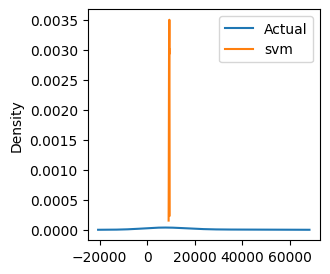

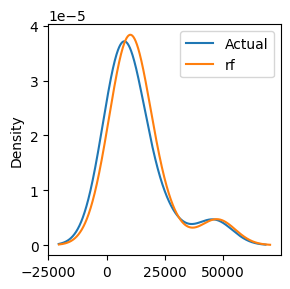

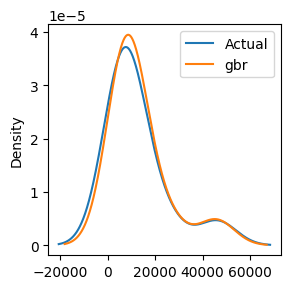

In [32]:
plt.figure(figsize=(4,4))
df_compare_models[['Actual', 'svm']].iloc[:11].plot.kde(figsize=(3,3))
df_compare_models[['Actual', 'rf']].iloc[:11].plot.kde(figsize=(3,3))
df_compare_models[['Actual', 'gbr']].iloc[:11].plot.kde(figsize=(3,3))

### Evaluating The Algorithm 

In [33]:
svm_r2_score = metrics.r2_score(y_test, svm_predict)
rf_r2_score = metrics.r2_score(y_test, rf_predict)
gbr_r2_score = metrics.r2_score(y_test, gbr_predict)

svm_mae_score = metrics.mean_absolute_error(y_test, svm_predict)
rf_mae_score = metrics.mean_absolute_error(y_test, rf_predict)
gbr_mae_score = metrics.mean_absolute_error(y_test, gbr_predict)


In [34]:
display(svm_r2_score)
display(svm_mae_score)

-0.10625951766376085

7717.871923385576

In [35]:
all_metrics = pd.DataFrame([[svm_r2_score, rf_r2_score, gbr_r2_score], [svm_mae_score, rf_mae_score, gbr_mae_score]], 
                           columns=['svm', 'rf', 'gbr'], index=['r2', 'mae'])
all_metrics

,svm,rf,gbr
r2,-0.106260,0.819922,0.835867
mae,7717.871923,2775.557092,2528.039547


### Predict Charges For New Customer

In [36]:
# make a new sample customer

customer_1 = pd.DataFrame({
    'age': 40,
    'sex': 1,
    'bmi': 65,
    'children': 3,
    'smoker': 1,
    'region': 2,
}, index=[0])

customer_1

,age,sex,bmi,children,smoker,region
0,40,1,65,3,1,2


### Predict Charges For A New Customer Using GBR Model Trained Using Train Dataset.

In [37]:
gbr.predict(customer_1)

array([7098.3424674])

### Predict Using Model Trained By Using Entire Dataset

In [38]:
gbr = GradientBoostingRegressor()
gbr.fit(X,y)
print('Charges customer_1 pay for insurance is {} US$ yearly'.format(gbr.predict(customer_1)))

Charges customer_1 pay for insurance is [8665.74683269] US$ yearly


# Save Model Using Joblib

In [39]:
joblib.dump(gbr, 'gbr_model')
model = joblib.load('gbr_model')
print('Charges customer_1 pay for insurance is {} US$ yearly'.format(model.predict(customer_1)))

Charges customer_1 pay for insurance is [8665.74683269] US$ yearly


# GUI 

In [40]:
def show_entry():
    
    p1 = float(e1.get() )
    p2 = float(e2.get() )
    p3 = float(e3.get() )
    p4 = float(e4.get() )
    p5 = float(e5.get() )
    p6 = float(e6.get() )
    
    model = joblib.load('gbr_model')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text='Insurance Cost').grid(row=7)
    Label(master,text=result).grid(row=8)

master = Tk()

master.title('Insurance Cost Prediction')

Label(master,text = 'Insurance Cost Prediction', bg='black', fg='white').grid(row=0, columnspan=5)
Label(master,text = 'Enter Your Age').grid(row=1)
Label(master,text = 'Enter Your Sex Press 0 for Male, Press 1 for Female').grid(row=2)
Label(master,text = 'Enter Your BMI Number').grid(row=3)
Label(master,text = 'Enter Your Children Number').grid(row=4)
Label(master,text = 'Smoker Press 0 for Yes. Press 1 for No').grid(row=5)
Label(master,text = 'Enter Your Region southeast:0, southwest:1, northwest:2, northeast:3').grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)

Button(master,text='Predict',command=show_entry).grid()


master.mainloop()